# Visualization of Data

Istall packages only once using the following command:
```python
!pip install PACKAGE

In [ ]:
#!pip install yfinance
#!pip install plotly
#!pip install pandas
#!pip install matplotlib
#!pip install statsmodels
#!pip install scikit-learn

## Import required packages

In [188]:
import pandas as pd
import numpy as np

import yfinance as yf

import plotly.graph_objs as go
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import StandardScaler

## Download financial data

In [132]:
# Download stock price data
tickers = ['AAPL', 'IBM', 'DUK', 'MRNA', 'XOM']
prices = yf.download(tickers, start="2019-01-01", end="2024-01-01")['Adj Close']
prices

[*********************100%***********************]  5 of 5 completed


Ticker                           AAPL        DUK         IBM        MRNA  \
Date                                                                       
2019-01-02 00:00:00+00:00   37.750080  66.872276   83.947762   15.330000   
2019-01-03 00:00:00+00:00   33.989895  66.848595   82.271873   15.500000   
2019-01-04 00:00:00+00:00   35.440907  67.401268   85.485214   16.959999   
2019-01-07 00:00:00+00:00   35.362011  67.117035   86.089981   16.270000   
2019-01-08 00:00:00+00:00   36.036133  67.961823   87.314125   16.950001   
...                               ...        ...         ...         ...   
2023-12-22 00:00:00+00:00  192.868149  93.947151  157.716400   94.889999   
2023-12-26 00:00:00+00:00  192.320221  93.821060  158.757202   97.330002   
2023-12-27 00:00:00+00:00  192.419830  93.403992  159.000397  100.730003   
2023-12-28 00:00:00+00:00  192.848206  94.005348  159.282471   98.790001   
2023-12-29 00:00:00+00:00  191.802185  94.121742  159.087936   99.449997   

Ticker                           XOM  
Date                                  
2019-01-02 00:00:00+00:00  52.611279  
2019-01-03 00:00:00+00:00  51.803493  
2019-01-04 00:00:00+00:00  53.713486  
2019-01-07 00:00:00+00:00  53.992809  
2019-01-08 00:00:00+00:00  54.385372  
...                              ...  
2023-12-22 00:00:00+00:00  99.358162  
2023-12-26 00:00:00+00:00  99.582405  
2023-12-27 00:00:00+00:00  99.114418  
2023-12-28 00:00:00+00:00  97.681229  
2023-12-29 00:00:00+00:00  97.476494  

[1258 rows x 5 columns]

## Plot prices

You can define functions, customize it they way you like, and use them later for different data.
```python
def function_name(x, y=VALUE):
    'your code that does something with x and y'
    'x input is required, and y input is optional'

In [136]:
# Plot the stock price data using Plotly with custom styling
def plot_stock_data(data, 
                    title='Stock Prices', xlabel='Date', ylabel='Closing Price',
                    width=1200, height=800,
                    opacity=0.9, colormap="hls",
                   ):
    fig = go.Figure()

    # Set the color palette using Seaborn (or any other color palette you prefer)
    color_palette = sns.color_palette(colormap, len(data.columns)).as_hex()

    # Add traces for each stock
    for i, ticker in enumerate(data.columns):
        fig.add_trace(go.Scatter(
            x=data.index, 
            y=data[ticker], 
            mode='lines',
            name=f'{ticker} {ylabel}',
            line=dict(width=2, color=color_palette[i]), # Use colors from the palette
            opacity=opacity,  # Set transparency (change as needed)
            hovertemplate=f'%{{x}}: <b>%{{y}}</b> ({ticker})<extra></extra>'
        ))
    
    # Customize the layout with various options
    fig.update_layout(
        title=title,
        title_font=dict(size=24, color='darkblue'),
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        xaxis=dict(showline=True, showgrid=False),
        yaxis=dict(showline=True, showgrid=True, gridcolor='lightgrey'),
        #hovermode='x',
        hovermode='x unified',
        legend=dict(title='Companies', orientation='v', y=1, yanchor='top'),
        margin=dict(l=50, r=50, t=80, b=50),
        paper_bgcolor='lightgray',
        plot_bgcolor='white',
        width=width,  # Set width of the figure
        height=height   # Set height of the figure
    )
    fig.show()

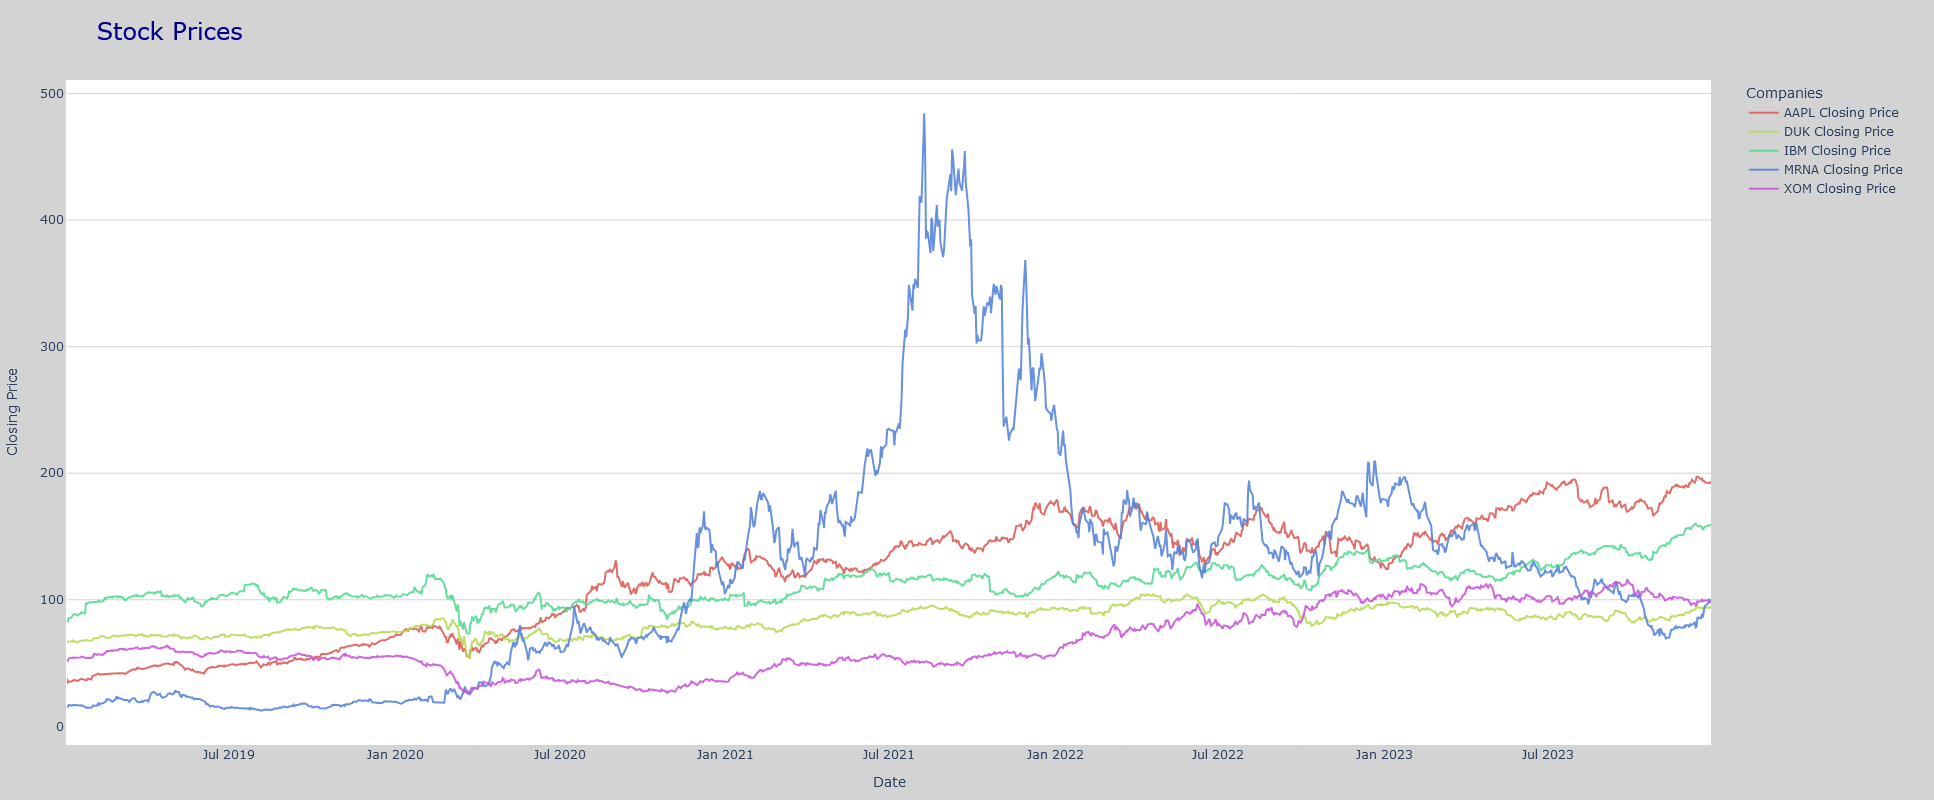

In [138]:
# Plot the stock prices
plot_stock_data(prices)

In [140]:
# Step 3: Convert prices to returns and calculate cumulative returns
returns = prices.pct_change().dropna()
cumulative_returns = (1 + returns).cumprod()

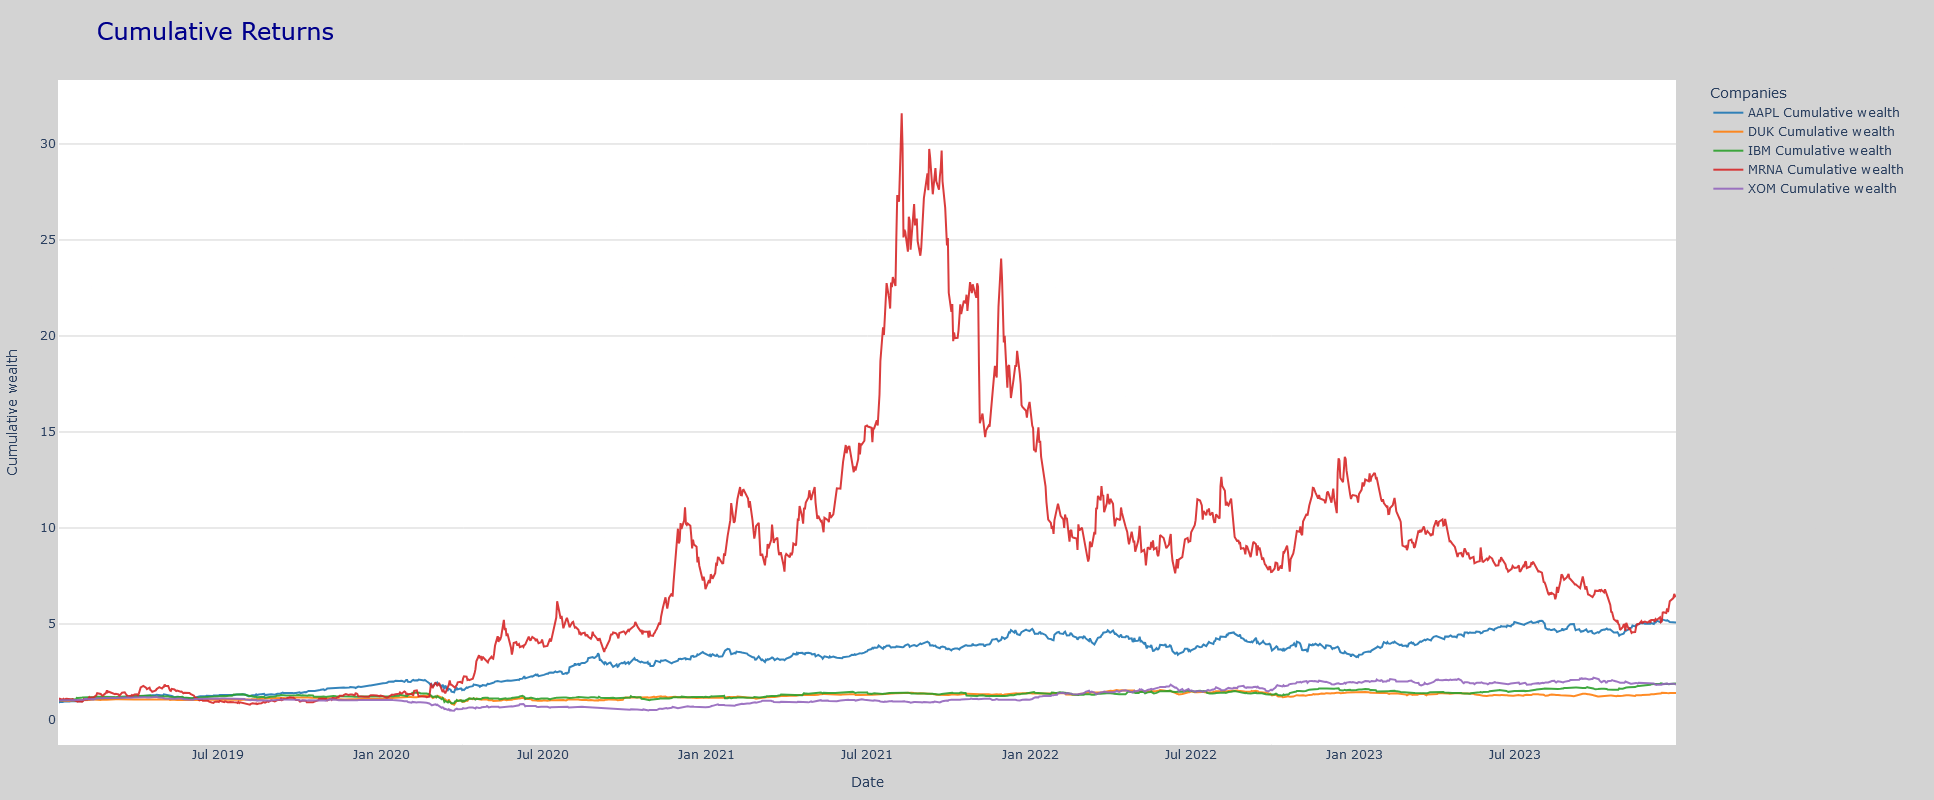

In [142]:
plot_stock_data(cumulative_returns, colormap="tab10", title="Cumulative Returns", ylabel="Cumulative wealth")

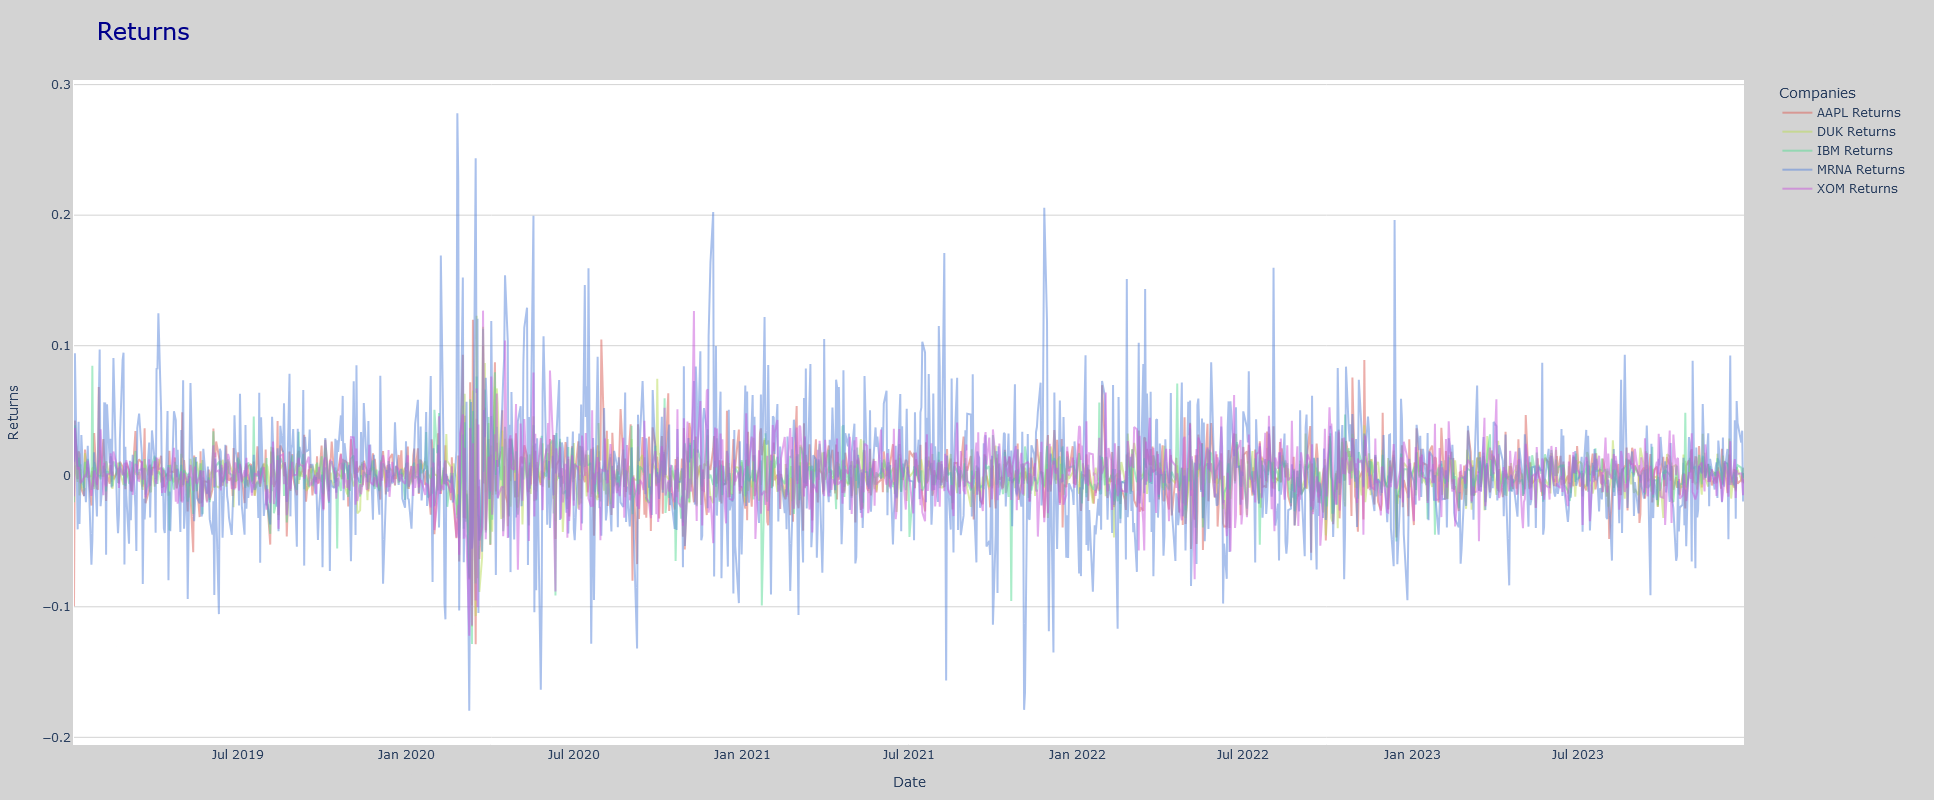

In [144]:
plot_stock_data(returns, title="Returns", ylabel="Returns", width=1800, opacity=0.5)

# Distribution of data

We first define a general plotting function that will plot us a probability density of our data:

In [148]:
def plot_kde(data, title='KDE of Stock Returns (Probability Density)', xlabel='Daily Return', ylabel='Probability Density',
             figsize=(14, 8),
             colormap="Dark2", alpha=0.4, bw_adjust=1):
    
    # Set the figure size
    plt.figure(figsize=figsize)
    
    # Get the tickers from the DataFrame column names
    tickers = data.columns
    
    # Choose a colormap from seaborn
    cmap = sns.color_palette(colormap, len(tickers))
    
    # Iterate through tickers and plot KDE using colormap
    for i, ticker in enumerate(tickers):
        sns.kdeplot(data[ticker], label=f'{ticker}', 
                    color=cmap[i], 
                    fill=True, alpha=alpha, linewidth=0,
                    bw_adjust=bw_adjust)  # Adjust the smoothness of KDE
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend(title='Stocks')
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

### Density of Returns (Stationary Data):

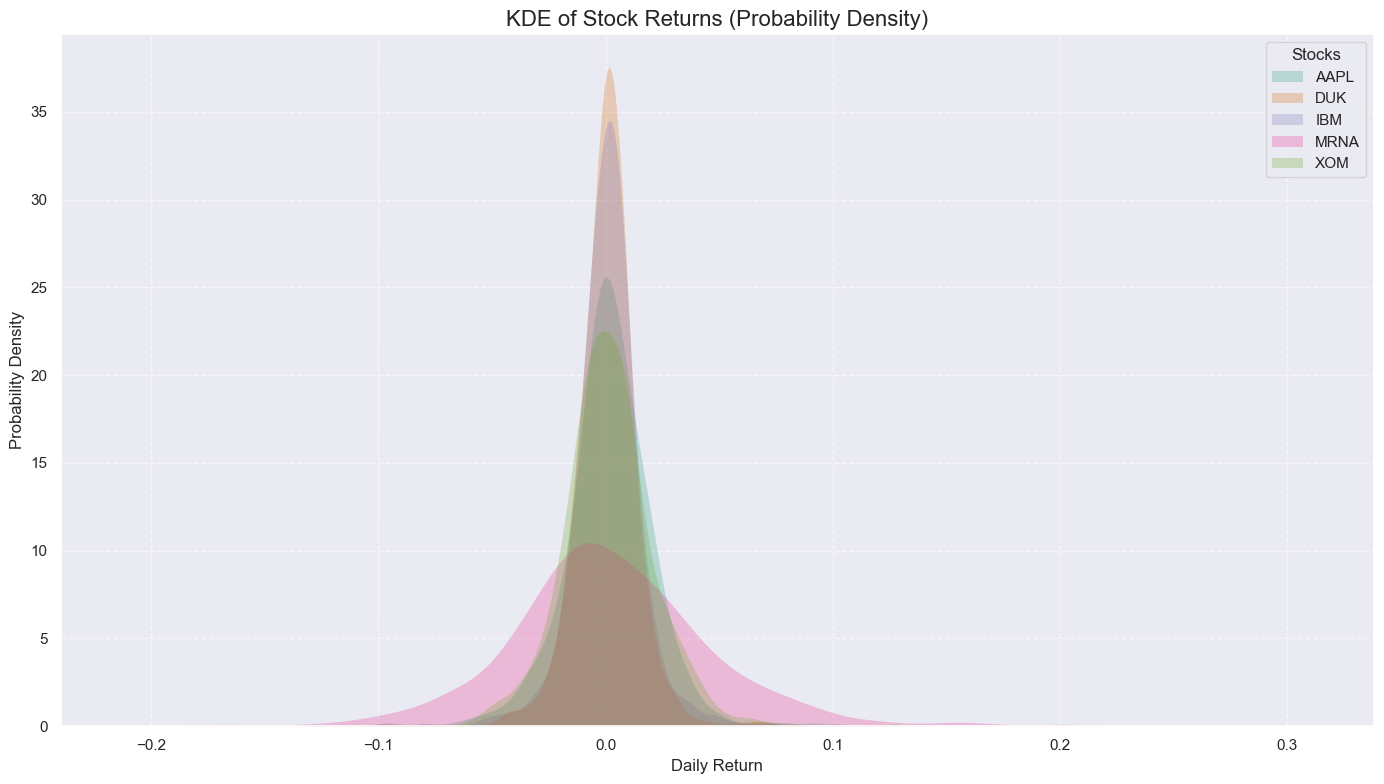

In [151]:
plot_kde(returns, alpha=0.25)

### Density of Standardized Returns (Stationary Data):

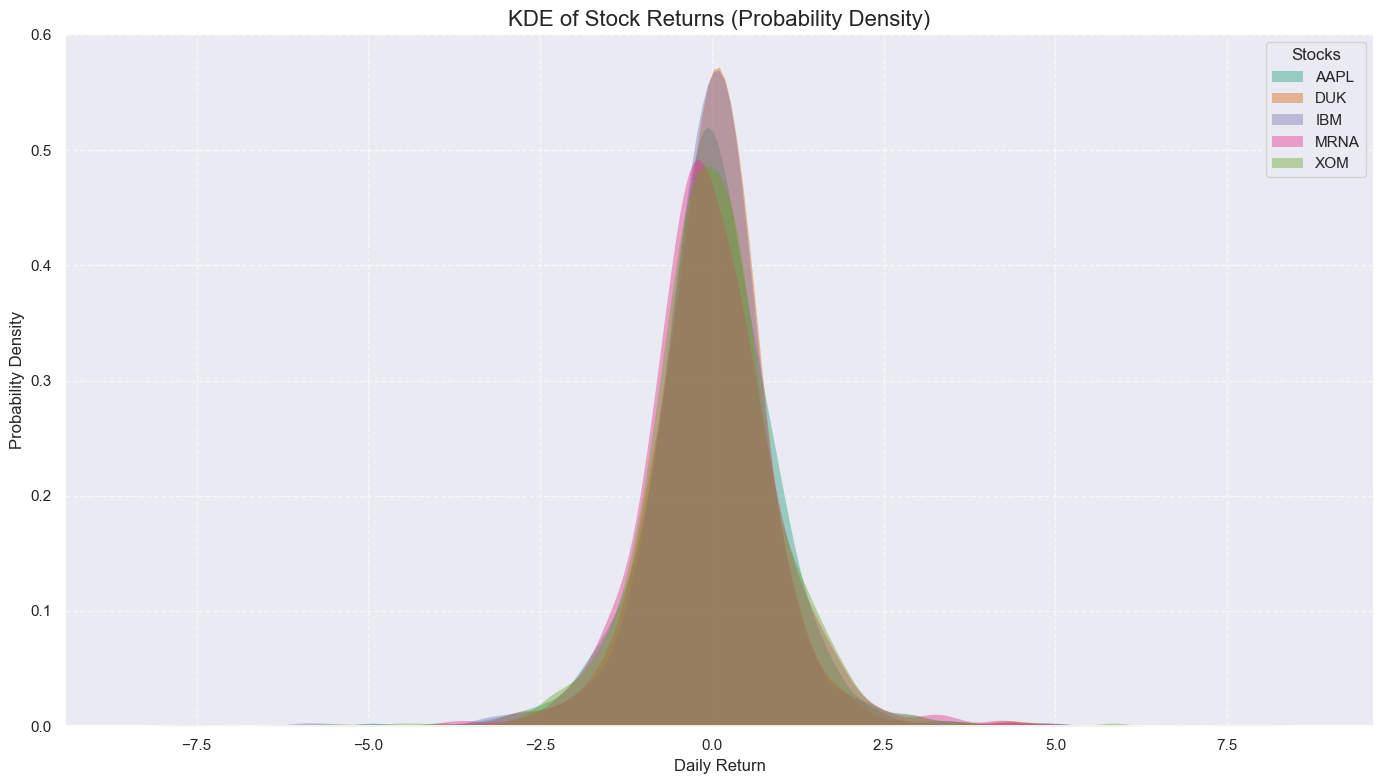

In [154]:
# Standardize data
scaler = StandardScaler()
standardized_returns = pd.DataFrame(scaler.fit_transform(returns), index=returns.index, columns=returns.columns)

# Plot distributions
plot_kde(standardized_returns)

- After standardizing the returns, the distribution appears more centered and symmetrical, with constant variance, indicating stationarity.
- Returns are often more stationary compared to prices, making them more suitable for AI modeling.
- Stationary data allows for more reliable model training because the **underlying statistical properties remain consistent**, which is crucial for the success of machine learning models like regression or time-series forecasting.

### Density of Standardized Prices (Non-Stationary Data):

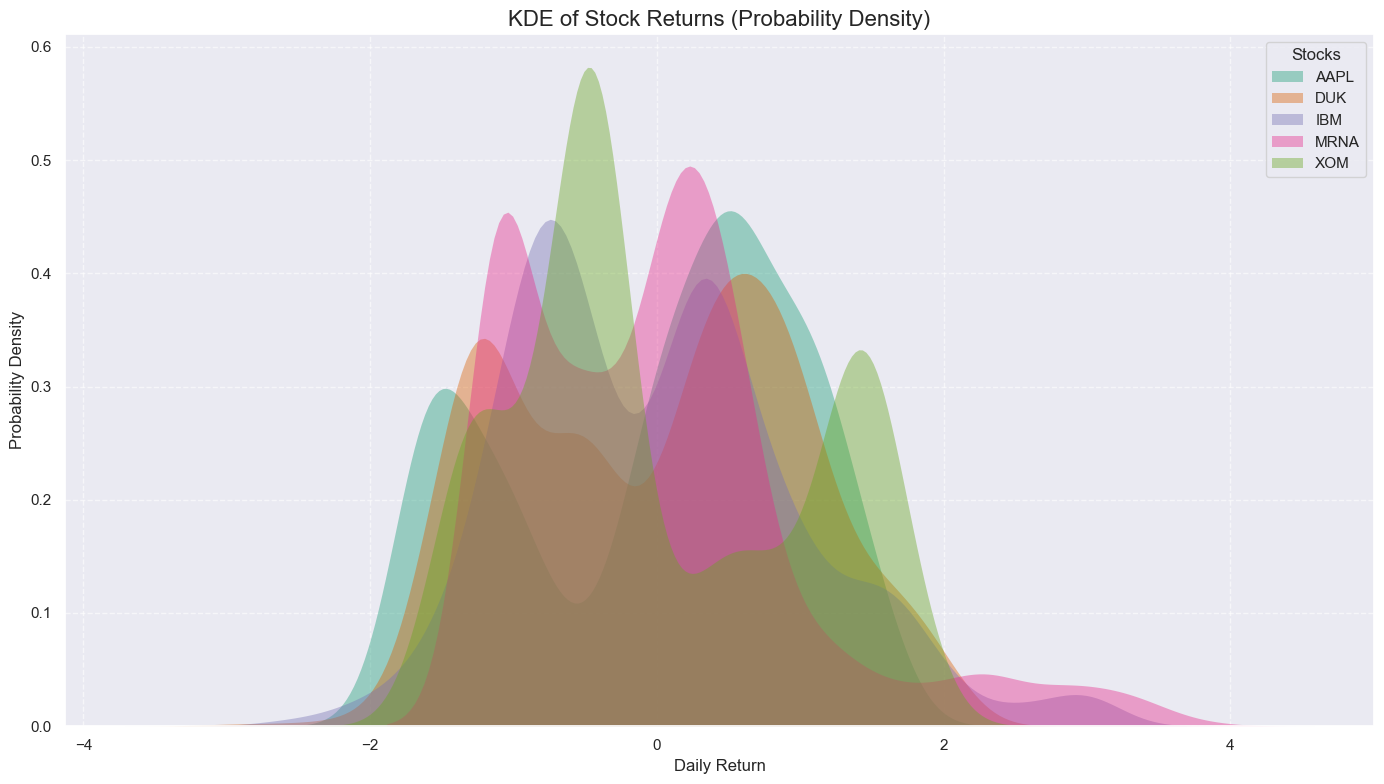

In [160]:
# Standardize data
scaler = StandardScaler()
standardized_prices = pd.DataFrame(scaler.fit_transform(prices), index=prices.index, columns=prices.columns)

# Plot distributions
plot_kde(standardized_prices)

- The distribution of prices often shows a broad, skewed, or multi-modal shape, indicating non-stationarity.
- Prices in financial markets are typically non-stationary, meaning their mean and variance change over time.
- Non-stationary data, like prices, make it difficult to model using AI techniques because many models assume that the statistical properties of the data (mean, variance, etc.) are constant over time.
- This leads to unreliable predictions, especially in forecasting.

### Contrast Between Prices (Non-Stationary series) and Returns (Stationary series)

- **Prices (Non-Stationary)**: Their distributional properties vary over time, making direct AI modeling challenging due to the shifting patterns in the data.
- **Returns (Stationary)**: Returns, after being standardized, exhibit more stable statistical characteristics, making them a better candidate for machine learning models.
- **Conclusion**: For AI models to be effective in financial contexts, it is essential to work with **stationary data**, like returns, to ensure that the **models are learning from stable and consistent patterns**. Non-stationary data, like prices, introduce complexities that require additional techniques (e.g., differencing, transformation) to handle appropriately.

# Dependencies

This function below provides several way to look at the relation between returns:

- It visualizes the relationship between two stocks' returns clearly.
- The regression line helps to see the overall trend in the relationship.
- The plot can be used to assess the correlation - a numerical measure of the relationship strength.
- The plot function is highly customizable, allowing you to adjust the plot to your specific needs.

In [214]:
def plot_stock_jointplot(returns, stock1, stock2, kind='reg', height=7, ratio=5, 
                                 bins=30, fill=True, kde_color='r', kde_levels=6, 
                                 alpha=0.2, fontsize=16, style="darkgrid", save_path=None):
    """
    Create a joint plot of stock returns for two specified stocks.
    
    Parameters:
    returns (pd.DataFrame): DataFrame containing stock returns
    stock1 (str): Ticker of the first stock
    stock2 (str): Ticker of the second stock
    kind (str): Kind of plot to draw in joint plot ('scatter', 'reg', 'resid', 'kde', 'hex')
    height (int): Height of the figure in inches
    ratio (int): Ratio of joint axes height to marginal axes height
    bins (int): Number of bins for histogram plots
    fill (bool): Whether to fill the histogram bars
    kde_color (str): Color of the KDE plot
    kde_levels (int): Number of contour levels for KDE plot
    alpha (float): Alpha level for the scatter plot
    fontsize (int): Font size for labels and title
    style (str): The style of the seaborn plot
    save_path (str): Path to save the figure. If None, figure is not saved
    
    Returns:
    g (seaborn.JointGrid): The JointGrid object containing the plot
    """
    
    # Set the style
    sns.set(style=style)
    
    # Create the joint plot
    g = sns.jointplot(
        data=returns,
        x=stock1,
        y=stock2,
        kind=kind,
        height=height,
        ratio=ratio,
        marginal_kws=dict(bins=bins, fill=fill)
    )
    
    # Customize the plot
    g.plot_joint(sns.kdeplot, color=kde_color, zorder=0, levels=kde_levels)
    g.ax_joint.collections[0].set_alpha(alpha)
    g.set_axis_labels(f"{stock1} Returns", f"{stock2} Returns", fontsize=fontsize)
    
    # Add a title
    plt.suptitle(f"Joint Distribution of Daily Returns: {stock1} vs {stock2}", fontsize=fontsize)
    plt.tight_layout()
    
    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight') # use option: save_path="stock_returns_plot.png" in functionarguments to save to image file
    
    # Show the plot
    plt.show()
    
    return g

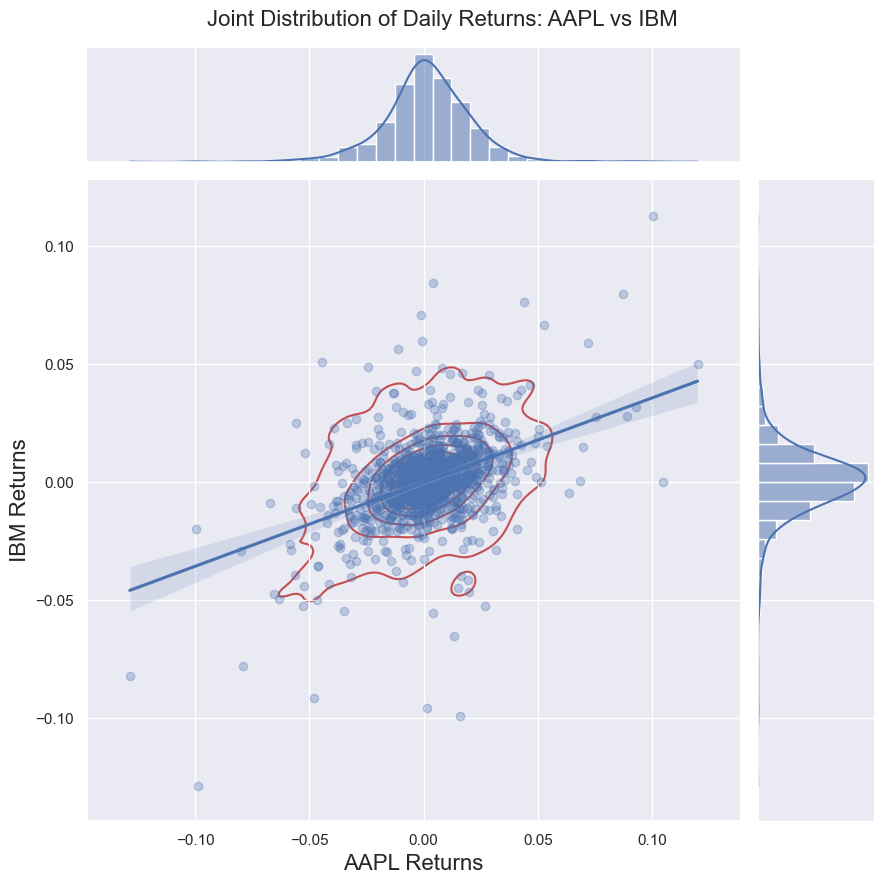

In [216]:
plot_stock_jointplot(returns, 'AAPL', 'IBM', height=9, kde_levels=8, alpha=0.3)

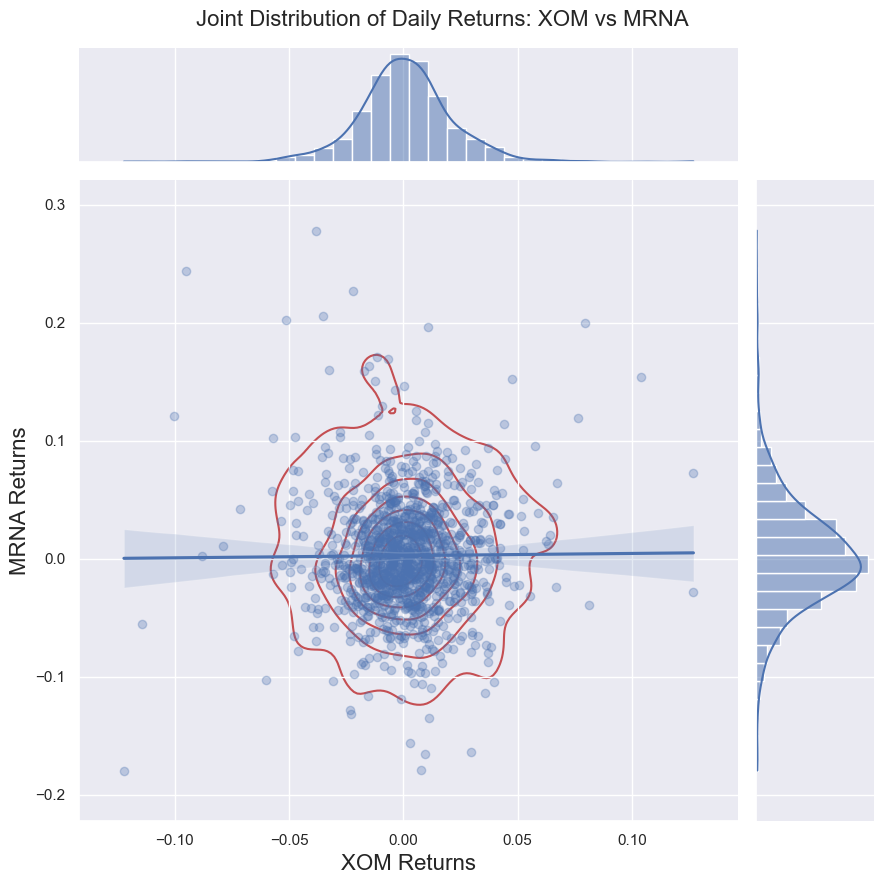

In [218]:
plot_stock_jointplot(returns, 'XOM', 'MRNA', height=9, kde_levels=8, alpha=0.3)

The concept behind visualizing stock returns using a scatter plot is to understand the relationship between the returns of two different stocks. 

**Visualizing Correlation**:
- Each point on the scatter plot represents a pair of returns for the two stocks on a given day.
- The x-axis typically shows the returns of one stock, while the y-axis shows the returns of the other.
- The pattern of these points can reveal the nature and strength of the relationship between the two stocks' returns.

**Understanding the Relationship**:
- Positive Correlation: If the points trend from the lower left to the upper right, it indicates a positive correlation. This means that when one stock's returns increase, the other tends to increase as well.
- Negative Correlation: If the points trend from the upper left to the lower right, it suggests a negative correlation. In this case, when one stock's returns increase, the other tends to decrease.
- No Correlation: If the points appear randomly scattered with no clear pattern, it suggests little to no correlation between the stocks' returns.


**Strength of Relationship**:
- The tightness of the cluster of points indicates the strength of the relationship.
- A tight cluster suggests a strong relationship, while a more dispersed pattern indicates a weaker relationship.

**Regression Line**:
- The regression line (if included) shows the best linear fit to the data points.
- It helps visualize the overall trend in the relationship between the two stocks' returns.
- The slope of this line indicates how much one stock's returns tend to change when the other's returns change.

**Correlation Coefficient**:
- This numerical value (ranging from -1 to 1) quantifies the strength and direction of the linear relationship between the two stocks' returns.
- A value close to 1 indicates a strong positive correlation, close to -1 indicates a strong negative correlation, and close to 0 indicates little to no linear correlation.

**Outliers and Anomalies**:
- Points that lie far from the main cluster can represent unusual events or outliers, which might warrant further investigation.

**Risk and Diversification**:
- This visualization helps in understanding how diversified a portfolio might be if these types of stocks are included.
- Stocks with low or negative correlation can help in diversifying a portfolio, potentially reducing overall risk.

**Market Conditions**:
- The pattern of points can sometimes reveal information about market conditions.
- For example, during a market-wide downturn, you might see a cluster of points in the lower left quadrant, indicating negative returns for both stocks.

**Sector Analysis**:
- Comparing stocks from the same sector might show a stronger correlation than stocks from different sectors.
- This can provide insights into sector-wide trends and how individual stocks move in relation to their sector.


**Time-Varying Relationships**:
- By color-coding points based on time periods, you can sometimes observe how the relationship between stocks changes over time.

Understanding these concepts helps investors and analysts make informed decisions about portfolio composition, risk management, and potential trading strategies. It's a powerful tool for visualizing complex financial relationships in a straightforward and intuitive manner.

In [222]:
def plot_stock_jointplot_colorbytime(returns, stock1, stock2, kind='reg', height=7, ratio=5, 
                         bins=30, fill=True, kde_color='r', kde_levels=6, 
                         alpha=0.7, fontsize=16, style="darkgrid", save_path=None,
                         color_by_time=True, cmap='Oranges'):
    """
    Create a joint plot of stock returns for two specified stocks, with option for time-based color coding.
    
    Parameters:
    returns (pd.DataFrame): DataFrame containing stock returns with DatetimeIndex
    stock1 (str): Ticker of the first stock
    stock2 (str): Ticker of the second stock
    kind (str): Kind of plot to draw in joint plot ('scatter', 'reg', 'resid', 'kde', 'hex')
    height (int): Height of the figure in inches
    ratio (int): Ratio of joint axes height to marginal axes height
    bins (int): Number of bins for histogram plots
    fill (bool): Whether to fill the histogram bars
    kde_color (str): Color of the KDE plot
    kde_levels (int): Number of contour levels for KDE plot
    alpha (float): Alpha level for the scatter plot
    fontsize (int): Font size for labels and title
    style (str): The style of the seaborn plot
    save_path (str): Path to save the figure. If None, figure is not saved
    color_by_time (bool): Whether to color-code points by time
    cmap (str): Name of the colormap to use for time-based coloring
    
    Returns:
    g (seaborn.JointGrid): The JointGrid object containing the plot
    """
    
    # Set the style
    sns.set(style=style)
    
    # Prepare data for time-based coloring
    if color_by_time:
        # Ensure the index is datetime
        if not isinstance(returns.index, pd.DatetimeIndex):
            raise ValueError("Returns DataFrame must have a DatetimeIndex for time-based coloring")
        
        # Normalize dates to [0, 1] range for coloring
        date_floats = (returns.index - returns.index.min()).total_seconds()
        date_floats = (date_floats - date_floats.min()) / (date_floats.max() - date_floats.min())

    # Create the joint plot
    g = sns.JointGrid(data=returns, x=stock1, y=stock2, height=height, ratio=ratio)
    
    if color_by_time:
        # Scatter plot with time-based coloring
        scatter = g.ax_joint.scatter(returns[stock1], returns[stock2], 
                                     c=date_floats, cmap=cmap, alpha=alpha)
        
        # Add colorbar
        cbar = plt.colorbar(scatter, ax=g.ax_joint)
        cbar.set_label('Time', fontsize=fontsize)
        
        # Custom histograms on the sides
        sns.histplot(x=returns[stock1], ax=g.ax_marg_x, kde=True, stat="density", 
                     bins=bins, color='gray', alpha=0.6)
        sns.histplot(y=returns[stock2], ax=g.ax_marg_y, kde=True, stat="density", 
                     bins=bins, color='gray', alpha=0.6)
    else:
        # Use seaborn's built-in jointplot for non-time-colored plots
        g = sns.jointplot(data=returns, x=stock1, y=stock2, kind=kind, height=height, 
                          ratio=ratio, marginal_kws=dict(bins=bins, fill=fill))
    
    # Customize the plot
    g.plot_joint(sns.kdeplot, color=kde_color, zorder=0, levels=kde_levels)
    
    # Set labels
    g.set_axis_labels(f"{stock1} Returns", f"{stock2} Returns", fontsize=fontsize)
    
    # Add a title
    plt.suptitle(f"Joint Distribution of Daily Returns: {stock1} vs {stock2}", fontsize=fontsize)
    plt.tight_layout()
    
    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()
    
    return g

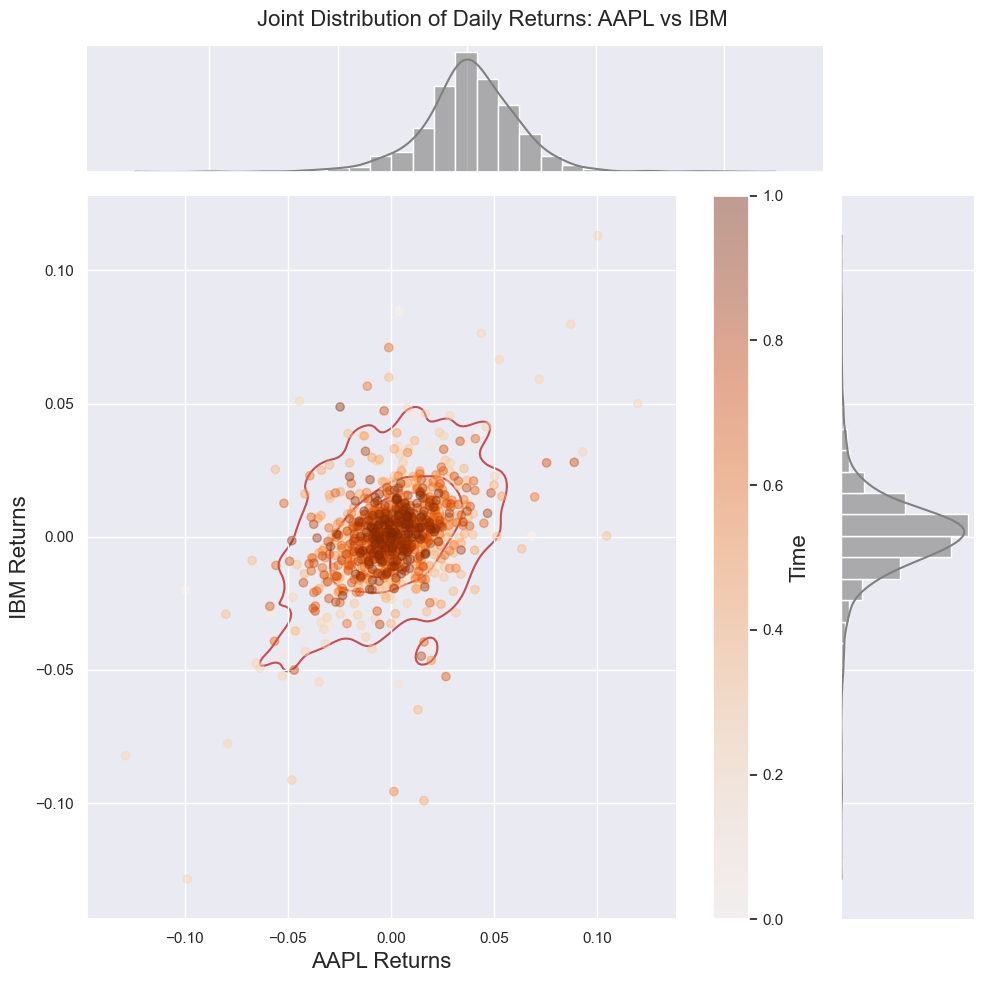

In [224]:
plot_stock_jointplot_colorbytime(returns, 'AAPL', 'IBM', color_by_time=True, cmap='Oranges', alpha=0.4, height=10)